# **Load Libraries**

In [0]:
import pandas as pd 
from keras.models import Sequential,Model
from keras.layers import Embedding, SimpleRNN,Input
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense,Dropout
from keras.layers import Embedding, Flatten, Dense,Conv1D,MaxPooling1D, regularizers,LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [25]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# Dataset is now stored in a Pandas Dataframe

In [27]:
df2.head()

,text,sentiment
0,For a movie that gets no respect there sure ar...,0
1,Bizarre horror movie filled with famous faces ...,0
2,"A solid, if unremarkable film. Matthau, as Ein...",0
3,It's a strange feeling to sit alone in a theat...,0
4,"You probably all already know this by now, but...",0


In [0]:
data_inputs =  df2["text"].get_values()
data_labels = df2.sentiment

In [105]:
tokenizer = Tokenizer(nb_words=10000)
tokenizer.fit_on_texts(data_inputs)
sequences = tokenizer.texts_to_sequences(data_inputs)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=1000)

labels = keras.utils.to_categorical(np.asarray(data_labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 88565 unique tokens.
Shape of data tensor: (25000, 1000)
Shape of label tensor: (25000, 2)


In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(.20 * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [117]:
#y_val = y_val.flatten()
print(y_train.shape)
print(y_val.shape)

(20000, 2)
(5000, 2)


In [122]:
maxlen = 1000
model = Sequential()
model.add(Embedding(10000,128,input_length=x_train.shape[1],dropout=0.2))
model.add(LSTM(300, dropout_U=0.2,dropout_W=0.2))
#model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
opt  = optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data = (x_val,y_val))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(300, dropout=0.2, recurrent_dropout=0.2)`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 1000, 128)         1280000   
_________________________________________________________________
lstm_17 (LSTM)               (None, 300)               514800    
_________________________________________________________________
dense_58 (Dense)             (None, 50)                15050     
_________________________________________________________________
dropout_20 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 2)                 102       
Total params: 1,809,952
Trainable params: 1,809,952
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 389s 19ms/step - loss: 0.

In [123]:
acc = model.evaluate(x_val, y_val, verbose=1)
print('Test data loss:', acc[0] )
print('Test data accuracy:', acc[1] * 100)

5000/5000 [==============================] - 137s 27ms/step
Test data loss: 0.309215956401825
Test data accuracy: 86.71


In [124]:
print("Saving model to disk \n")
mp = ".\\Models\\imdb_modelRNNLSTM.h5"
model.save(mp)

Saving model to disk 



In [125]:
# serialize model to JSON
model_json = model.to_json()
with open(".\\Models\\imdb_modelRNNLSTM.h5", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelRNNLSTM.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
edgar = pd.read_json("/content/earnings_call_ip_data (2).json")

In [0]:
sent = {'positive': 1,'negative': 0,'neutral': 2} 
edgar.sentiment = [sent[item] for item in edgar.sentiment] 

In [0]:
data_inputs1 =  edgar["text"].get_values()
data_labels1 = edgar.sentiment

In [129]:
tokenizer = Tokenizer(nb_words=10000)
tokenizer.fit_on_texts(data_inputs1)
sequences = tokenizer.texts_to_sequences(data_inputs1)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=1000)

labels = keras.utils.to_categorical(np.asarray(data_labels1))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 6395 unique tokens.
Shape of data tensor: (1649, 1000)
Shape of label tensor: (1649, 3)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
# nb_validation_samples = int(.20 * data.shape[0])

# x_train = data[:-nb_validation_samples]
# y_train = labels[:-nb_validation_samples]
# x_val = data[-nb_validation_samples:]
# y_val = labels[-nb_validation_samples:]

In [131]:
print(data.shape)
print(labels.shape)

(1649, 1000)
(1649, 3)


In [132]:
from keras.models import model_from_json
# load json and create model
json_file = open(".\\Models\\imdb_modelRNNLSTM.h5", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelRNNLSTM.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
for layer in loaded_model.layers:
  layer.trainable = True

In [0]:

model1 = Sequential()
for layer in loaded_model.layers[:-1]:
    model1.add(layer)
    
model1.add(Dense(3,activation='softmax'))
model1.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['acc'])

In [135]:

print('Test Evaluation with finance data')
evaluation = model1.evaluate(data,labels,batch_size=64)
print('Loss:', evaluation[0], 'Accuracy:', evaluation[1])

Test Evaluation with finance data
1649/1649 [==============================] - 24s 15ms/step
Loss: 0.778530354569217 Accuracy: 0.5286032100964344


In [0]:
Prediction_RNNLSTM = model1.predict(data)

In [0]:
y_pred = (Prediction_RNNLSTM > 0.5)

y_pred = y_pred.astype(int)


In [0]:
for r in Prediction_RNNLSTM:
  maxValueIndex =r.argmax()
  #print(maxValueIndex)
  r[0] = 0.0
  r[1] = 0.0
  r[2] = 0.0
  r[maxValueIndex] = 1.0
  
  

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels.argmax(axis=1), Prediction_RNNLSTM.argmax(axis =1)) 
print('Confusion Matrix :')
print(cm) 

Confusion Matrix :
[[ 96   0  62]
 [422   0 238]
 [674   0 157]]


[]

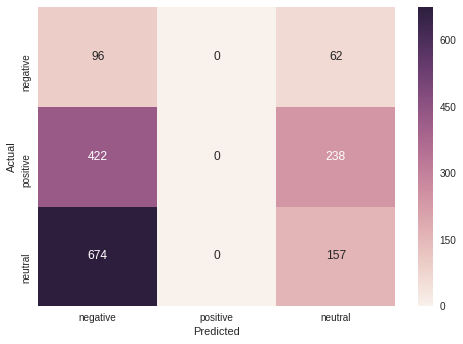

In [144]:
LABELS = ['negative', 'positive','neutral']
a = sns.heatmap(cm, annot=True, xticklabels=LABELS, yticklabels=LABELS, fmt='g')
a.set(xlabel='Predicted', ylabel='Actual')
a.plot()
# xl = plt.xlabel("Predicted")

# yl = plt.ylabel("Actual")